# MNIST (PCA + SVM)

In [8]:
# libraries
%matplotlib inline
from __future__ import print_function
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_mldata
from sklearn.grid_search import GridSearchCV
from sklearn import svm, metrics, cross_validation
import matplotlib.pyplot as plt
import numpy as np
import timeit

In [2]:
# load MNIST data
mnist = fetch_mldata("MNIST original")

# rescale the data
X, y = mnist.data / 255., mnist.target

# separate train, test
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

### PCA:
- Components: 100

Variance explained with 100 components: 0.9146


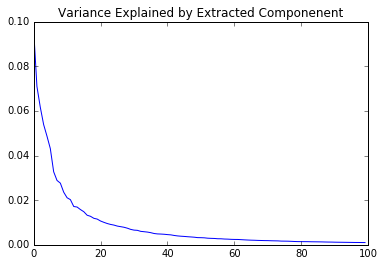

In [10]:
pca = PCA(n_components=100)
pca.fit(X_train)
train_ext = pca.transform(X_train)
test_ext = pca.transform(X_test)
print("Variance explained with 100 components: %.4f" % np.sum(pca.explained_variance_ratio_))
plt.plot(pca.explained_variance_ratio_)
plt.title('Variance Explained by Extracted Componenent')
plt.show()

### SVM:
- kernel: Radial Basis Function (RBF)
- gamma : 0.001
- c     : 1

In [12]:
classifier = svm.SVC(gamma=0.001)
start_time = timeit.default_timer()
classifier.fit(train_ext, y_train)
elapsed = timeit.default_timer() - start_time
print("SVM fit time: %.2f sec" % (elapsed))
predicted = classifier.predict(test_ext)

SVM fit time: 139.01 sec


### Cross validation
- fold: 5

In [13]:
start_time = timeit.default_timer()
scores = cross_validation.cross_val_score(classifier, train_ext, y_train, cv=5, n_jobs=-1)
elapsedCV = timeit.default_timer() - start_time
print("Cross validatione time: %.2f sec" % (elapsedCV))
np.set_printoptions(precision=4)
print("Cross validation scores:", scores)
print("Cross validation mean: %0.3f (+/-%0.03f)" % (scores.mean(), scores.std() * 2))

Cross validatione time: 318.80 sec
Cross validation scores: [ 0.9344  0.9299  0.9299  0.9262  0.9376]
Cross validation mean: 0.932 (+/-0.008)


### Classification metrics:

In [17]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, predicted, range(10)))
print("\nAccuracy on test data: %.4f" % metrics.accuracy_score(y_test, predicted))

Confusion matrix:
[[ 967    0    1    0    0    5    5    1    1    0]
 [   0 1119    2    3    0    1    3    1    6    0]
 [   9    1  953    9    9    1   16   11   21    2]
 [   1    1   16  945    1   17    2   12   11    4]
 [   1    1    6    0  931    0    9    2    2   30]
 [   7    5    5   33    6  806   13    2    9    6]
 [  10    3    4    1    6   10  923    0    1    0]
 [   2   14   22    5    8    1    0  953    4   19]
 [   4    7    6   14    8   25   12    6  887    5]
 [   9    6    0   12   33    6    1   15    7  920]]

Accuracy on test data: 0.9404


### Error samples:

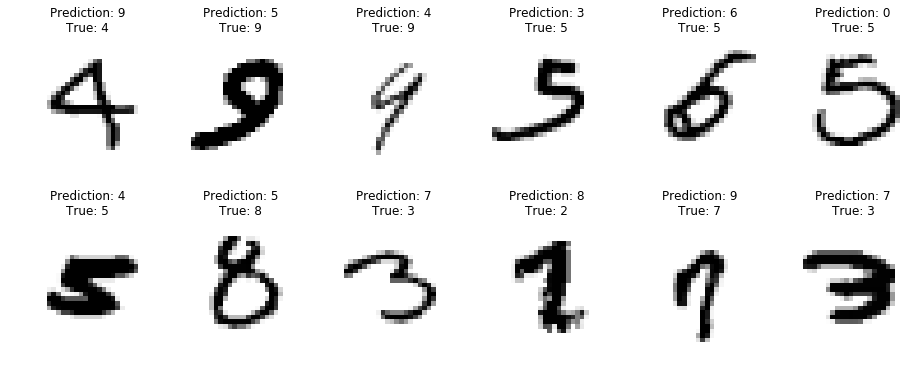

In [27]:
misslabels = predicted[y_test != predicted]
reallabels = y_test[y_test != predicted]
missimages = X_test[y_test != predicted]
choice = np.random.choice(range(len(misslabels)), 12, replace=False)
plt.figure(figsize=(16, 6))
for index, i in enumerate(choice):
    plt.subplot(2, 6, index+1)
    plt.axis('off')
    plt.imshow(missimages[i].reshape(28, 28), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i\nTrue: %i' % (misslabels[i], reallabels[i]))